In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Reading an image into a given representation

In [4]:
def imReadAndConvert(filename:str, representation:int)->np.ndarray:
    if representation == 1:
        img = cv2.imread(filename,0)
    elif representation == 2:
        img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    norm_img = normalize(img_rgb)
    return norm_img

def normalize(img):
    h,w,null = img.shape
    norm_img = np.zeros(img.shape)
    for i in range(h):
        for j in range(w):
            norm_img[i,j] = img[i,j]/255
    return norm_img

def unnormalize(img):
    h,w,null = img.shape
    norm_img = np.zeros(img.shape)
    for i in range(h):
        for j in range(w):
            norm_img[i,j] = img[i,j]*255
    return norm_img.astype('uint32')

### Displaying an image

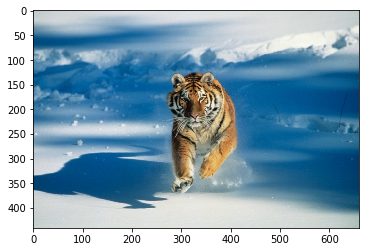

In [5]:
def imDisplay(filename:str, representation:int):
    img = imReadAndConvert(filename, representation)
    plt.imshow(img);

imDisplay('pool.jpg',2)

### Transforming an RGB image to YIQ color space

In [6]:
def transformRGB2YIQ(imRGB:np.ndarray)->np.ndarray:
    yiqMat = np.array([[0.299, 0.587, 0.144],[0.596, -0.275, -0.321],[0.212, -0.523, 0.311]])
    h,w,null = imRGB.shape
    imYIQ = np.zeros([h,w,3])
    for i in range(h):
        for j in range(w):
            imYIQ[i,j] = imRGB[i,j].dot(yiqMat)
    return imYIQ

def transformYIQ2RGB(imYIQ:np.ndarray)->np.ndarray:
    yiqMat = np.array([[0.299, 0.587, 0.144],[0.596, -0.275, -0.321],[0.212, -0.523, 0.311]])
    rgbMat = np.linalg.inv(yiqMat)
    h,w,null = imYIQ.shape
    imRGB = np.zeros([h,w,3])
    for i in range(h):
        for j in range(w):
            imRGB[i,j] = imYIQ[i,j].dot(rgbMat)
    return imRGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


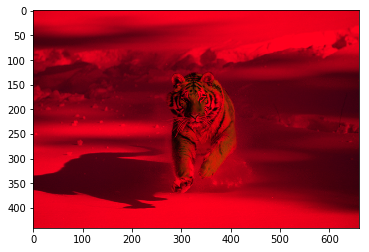

In [7]:
yiq = transformRGB2YIQ(imReadAndConvert('pool.jpg',2))
plt.imshow(yiq[:,:,:]);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


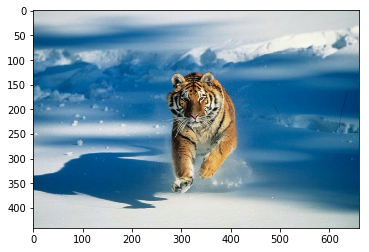

In [8]:
rgb = transformYIQ2RGB(yiq)
plt.imshow(rgb);

### Histogram equalization

In [54]:
def plotHist(hist, img):
    unnorm = unnormalize(img)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(unnorm.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

def histogramEqualize(imOrig:np.ndarray)->(np.ndarray,np.ndarray,np.ndarray):
    unnorm = unnormalize(imOrig)
    hist,bins = np.histogram(unnorm.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    res = cdf[unnorm]
    hist2,bins2 = np.histogram(res.flatten(),256,[0,256])
    return (res, hist, hist2)

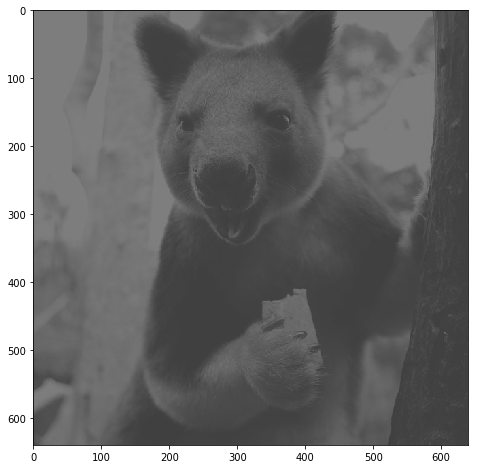

In [73]:
img = imReadAndConvert('treekang.png', 1)
plt.figure(figsize = (8,8))
plt.imshow(img)

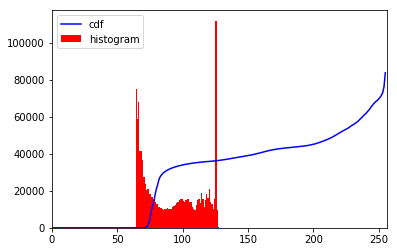

In [65]:
plotHist(res[1], img)

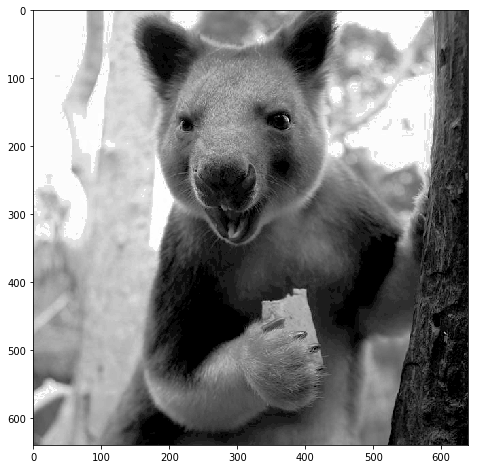

In [74]:
res = histogramEqualize(img2)
plt.figure(figsize = (8,8))
plt.imshow(res[0])

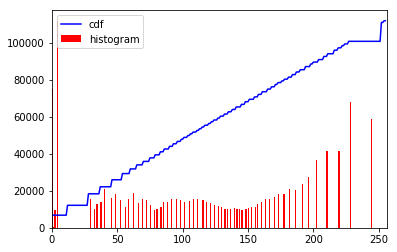

In [67]:
plotHist(res[2], res[0])